##### <p> Samuel Wolfe <br> December 2, 2023 <br> MSBA 207 <br> Chapter 20 </p>

In [1]:
%matplotlib inline

from pathlib import Path

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import _stop_words
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize          
from nltk.stem.snowball import EnglishStemmer 
import matplotlib.pylab as plt
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

# nltk.download('punkt')

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('E:/Aliit/School/MSBA/206/MSBA-206/dmba')
#DATA = Path('C:/Users/Min Li/OneDrive/teaching/DS110/dmba')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)
# Load and preprocess data set 

## Problem 20.1

Tokenization. Consider the following text version of a post to<br>
an online learning forum in a statistics course:

Thanks John!\<br />\<br />\<font size=”3”>
\&quot;Illustrations and demos will be
provided for students to work through on
their own\&quot;\</font>.
Do we need that to finish project? If yes,
where to find the illustration and demos?
Thanks for your help.\<img title=”smile”
alt=”smile” src=”\url{http://lms.statistics.
com/pix/smartpix.php/statistics_com_1/s/smil
ey.gif}” >\<br /> \<br />

20.1.a Identify 10 non-word tokens in the passage.<br><br>
Thanks John`!<br /> <br /><font size=”3”>`<br>
`&quot;`Illustrations and demos will be<br>
provided for students to work through on<br>
their own`&quot;</font>.`<br>
Do we need that to finish project`?` If yes`,`<br>
where to find the illustration and demos`?`<br>
Thanks for your help`.<img title=”smile”`<br>
`alt=”smile” src=”url{http://lms.statistics.`<br>
`com/pix/smartpix.php/statistics_com_1/s/smil`<br>
`ey.gif}”><br /><br />`<br><br>
All the highlighted text are non-word tokens

20.1.b Suppose this passage constitutes a document to be<br>
classified, but you are not certain of the business goal of the<br>
classification task. Identify material (at least 20% of the<br>
terms) that, in your judgment, could be discarded fairly<br>
safely without knowing that goal.<br><br>
With 36 words, to achieve 20% I need to select 8 words.<br><br>
`Thanks` `John` Illustrations `and` demos `will` `be` provided `for` students<br>
`to` work `through` `on` `their` own `Do` `we` need `that` `to` finish project `If` yes<br>
where `to` find `the` illustration `and` demos `Thanks` `for` `your` help<br><br>
The highlighted words are my selected words.

20.1.c Suppose the classification task is to predict whether this<br>
post requires the attention of the instructor, or whether a<br>
teaching assistant might suffice. Identify the 20% of the<br>
terms that you think might be most helpful in that task.<br><br>
With 36 words, to achieve 20% I need to select 8 words.<br><br>
`Thanks` John Illustrations `and` demos `will` `be` provided `for` students<br>
`to` work `through` `on` `their` own Do we need `that` `to` finish project `If` yes<br>
where `to` find `the` illustration `and` demos `Thanks` `for` `your` help<br><br>
The non-highlighted words are my selected words.

20.1.d What aspect of the passage is most problematic from the<br>
standpoint of simply using a bag-of-words approach, as<br>
opposed to an approach in which meaning is extracted?<br><br>
When looking at the passage the most problematic part from the standpoint<br>
of simply using a bag-of-words approach is there is context to the order of<br>
the words that we lose if we just select words at random.<br>
If we look at it from a meaning standpoint, we can see that the first sentence is<br>
addressing an original question from John back to John. This implies the answer<br>
there is more context to be gained from looking at the passage as a whole rather than<br>
clusters of words.

## Problem 20.2

Classifying Internet Discussion Posts. In this problem,<br>
you will use the data and scenario described in this chapter’s<br>
example, in which the task is to develop a model to classify<br>
documents as either auto-related or electronics-related.<br>

20.2.a Load the zipped file into Python and create a label vector.

In [3]:
corpus = []
label = []
with ZipFile(DATA / 'AutoAndElectronics.zip') as rawData:
    for info in rawData.infolist():
        if info.is_dir(): 
            continue
        label.append(1 if 'rec.autos' in info.filename else 0)
        corpus.append(rawData.read(info))



preprocessor = CountVectorizer(encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

20.2.c Use the LSA to create 10 concepts. Explain what is different<br>
about the concept matrix, as opposed to the TF-IDF matrix.<br>

In [4]:
svd = TruncatedSVD(20)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

With TF-IDF matrices we get term frequency representation that are<br>
adjusted by the inverse of their document frequencies. This helps show<br>
how important certain words are across all entries put into the matrix.

20.2.d Using this matrix, fit a predictive model (different from the<br>
model presented in the chapter illustration) to classify<br>
documents as autos or electronics. Compare its<br>
performance to that of the model presented in the chapter<br>
illustration.<br>

Confusion Matrix (Accuracy 0.9630)

       Prediction
Actual   0   1
     0 963  37
     1  37 963
Confusion Matrix (Accuracy 0.9525)

       Prediction
Actual   0   1
     0 377  20
     1  18 385


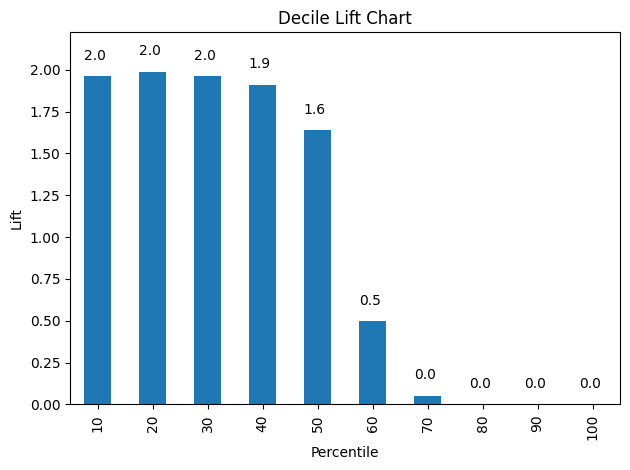

In [5]:
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(lsa_tfidf, label)
classificationSummary(label, logit_reg.predict(lsa_tfidf))

# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=1)

# run logistic regression model on training
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

# print confusion matrix and accuracty
classificationSummary(ytest, logit_reg.predict(Xtest))

df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=True)

plt.tight_layout()
plt.show()

Confusion Matrix (Accuracy 0.9515)

       Prediction
Actual   0   1
     0 951  49
     1  48 952
Confusion Matrix (Accuracy 0.9487)

       Prediction
Actual   0   1
     0 376  21
     1  20 383


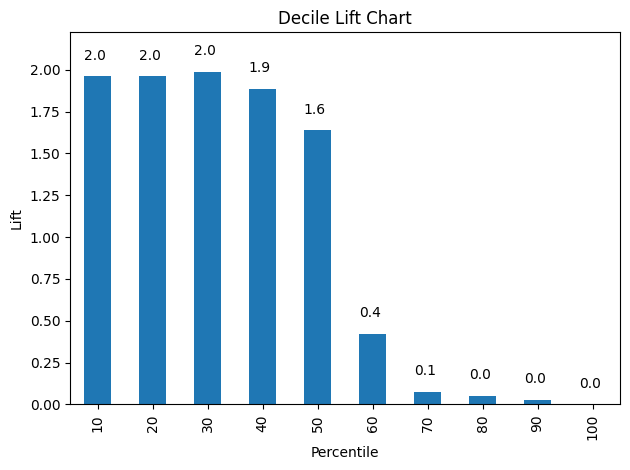

In [6]:
svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(lsa_tfidf, label)
classificationSummary(label, logit_reg.predict(lsa_tfidf))
# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=1)

# run logistic regression model on training
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

# print confusion matrix and accuracty
classificationSummary(ytest, logit_reg.predict(Xtest))
df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=True)

plt.tight_layout()
plt.show()

Looking at this model vs the example in the book, my model is less accurate. This is likely due to us using fewer concepts for our LSA. Using a Decile Lift Chart we see there is some gain in the 30% decile, but that was traded with the 40%. We the see loss in the 50% decile that appears to be more spread out in the 70%+.

## Problem 20.3

Classifying Classified Ads Submitted Online. Consider<br>
the case of a website that caters to the needs of a specific<br>
farming community, and carries classified ads intended for that<br>
community. Anyone, including robots, can post an ad via a web<br>
interface, and the site owners have problems with ads that are<br>
fraudulent, spam, or simply not relevant to the community.<br>
They have provided a file with 4143 ads, each ad in a row, and<br>
each ad labeled as either − 1 (not relevant) or 1 (relevant). The<br>
goal is to develop a predictive model that can classify ads<br>
automatically.<br><br>
Open the file farm-ads.csv, and briefly review some of the<br>
relevant and non-relevant ads to get a flavor for their<br>
contents.<br><br>
Following the example in the chapter, preprocess the data<br>
in Python, and create a term-document matrix, and a<br>
concept matrix. Limit the number of concepts to 20.<br>

In [7]:
df_farm = pd.read_csv(DATA / 'farm-ads.csv',names=['value','advert'])

In [8]:
advert = df_farm['advert']
value = df_farm['value']

In [9]:
advert.head(3)

0     ad-abdominal ad-aortic ad-aneurysm ad-doctorf...
1     ad-abdominal ad-aortic ad-aneurysm ad-million...
2     ad-absorbent ad-oil ad-snar ad-factory ad-dir...
Name: advert, dtype: object

In [10]:
# Apply CountVectorizer and TfidfTransformer sequentially
count_vect = CountVectorizer(encoding='latin1')
tfidfTransformer = TfidfTransformer(smooth_idf=False, norm=None)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
counts = count_vect.fit_transform(advert)
tfidf = tfidfTransformer.fit_transform(counts)

printTermDocumentMatrix(count_vect, tfidf)

                   S1        S2   S3   S4   S5   S6   S7   S8   S9  S10  ...  \
aa           0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaa          7.383265  7.383265  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaa         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaaa        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaaaaaaaew  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...               ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
zydeco       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zyla         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zymosine     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zyrtec       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zzay         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

             S4134  S4135  S4136  S4137

In [11]:
preprocessor = CountVectorizer(encoding='latin1')
preprocessedText = preprocessor.fit_transform(advert)

tfidfTransformer = TfidfTransformer(smooth_idf=False, norm=None)
tfidf = tfidfTransformer.fit_transform(preprocessedText)

svd = TruncatedSVD(20)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

printTermDocumentMatrix(count_vect, tfidf)
lsa_tfidf = lsa.fit_transform(tfidf)

                   S1        S2   S3   S4   S5   S6   S7   S8   S9  S10  ...  \
aa           0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaa          7.383265  7.383265  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaa         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaaa        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
aaaaaaaaaew  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...               ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
zydeco       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zyla         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zymosine     0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zyrtec       0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
zzay         0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

             S4134  S4135  S4136  S4137

20.3.a.i

In [12]:
sparsity = (1 - (tfidf.nnz / (tfidf.shape[0] * tfidf.shape[1]))) * 100
print("Percentage of zero entries in the TF-IDF matrix: {:.2f}%".format(sparsity))

Percentage of zero entries in the TF-IDF matrix: 99.69%


20.3.a.ii<br><br>
Looking at the output above for the printed Term Document Matrix, we can see<br>
for `aaa`, `S1` and `S2` have the frequency of `aaa` within advertisement <br>
of `0.295645` and `0.232515` respectively. This tells us that off all the adds <br>
this term `aaa` is about `30%` and `24%` of the counts just in ads `S1` and `S2`<br>

20.3.b<br><br>
The difference between a term-document matrix and a concept-document matrix<br>
is that a concept-document matrix seeks to reduce the dimensionality of a matrix<br>
by grouping concepts into similar pools. Using PCA combined with concept-document<br>
is the next logical step where we analyze the features showing as prominent within<br>
the concept-document matrix to determine what features to look for in the future.

20.3.c Using logistic regression, partition the data (60% training,<br>
40% validation), and develop a model to classify the<br>
documents as “relevant” or “non-relevant.” Comment on its<br>
efficacy.<br>

Confusion Matrix (Accuracy 0.8081)

       Prediction
Actual    0    1
     0 1506  427
     1  368 1842
Confusion Matrix (Accuracy 0.8034)

       Prediction
Actual   0   1
     0 631 159
     1 167 701


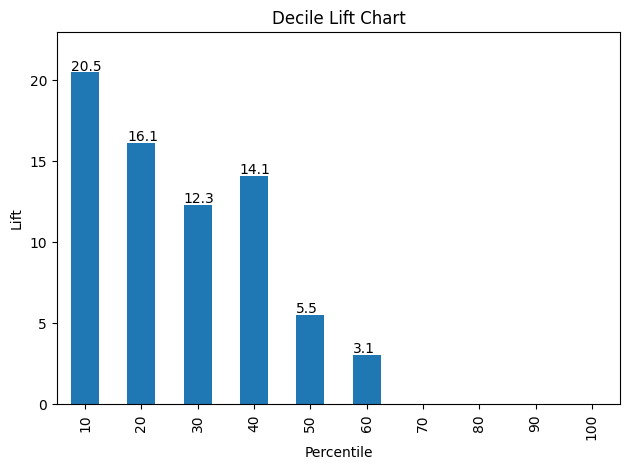

In [13]:
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(lsa_tfidf, value)
classificationSummary(value, logit_reg.predict(lsa_tfidf))
# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, value, test_size=0.4, random_state=1)

# run logistic regression model on training
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

# print confusion matrix and accuracty
classificationSummary(ytest, logit_reg.predict(Xtest))
df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=True)

plt.tight_layout()
plt.show()

The model appears to be quite efficient. Generating significant lift all the way down to the 70% decile.

20.3.d Why use the concept-document matrix, and not the term-document<br>
matrix, to provide the predictor variables?<br><br>

Term-document Matrix are more likely to over fit the model. Looking at specific<br>
terms rather than concepts means we might over fit the training data and could result<br>
our model failing when applied to validation or test data.